In [1]:
import numpy as np
import MSMRD as mrd
import MSMRD.integrators as integrators
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
MFPTS = np.zeros([9,9])                                                                                                                                                                                        
minima = np.array([[0.0,0.0], [1.0,0.0] , [1.1, 1.0], [-0.1,0.9], [-1.3,0.8], [-1.0,-0.2], [-0.6,-1.0], [0.9,-0.8], [0.2,-1.5]])                                                                               
class truncTrajsModel(object):                                                                                                                                                                                 
    def __init__(self, entryTrajsStart, entryTrajsEnd, entryTimes, exitTrajs, exitTimes, exitProbs, MSMtime, tmatrix):                                                                                         
        self.entryTrajsStart = entryTrajsStart                                                                                                                                                                 
        self.entryTrajsEnd = entryTrajsEnd                                                                                                                                                                     
        self.entryTimes = entryTimes                                                                                                                                                                           
        self.exitTrajs = exitTrajs                                                                                                                                                                             
        self.exitTimes = exitTimes                                                                                                                                                                             
        self.exitProbs = exitProbs                                                                                                                                                                             
        self.tmatrix = tmatrix                                                                                                                                                                                 
        self.MSMtimestep = MSMtime                                                                                                                                                                             
                                                                                                                                                                                                               
def sampleBathPosition():                                                                                                                                                                                      
    theta = 2*np.pi * np.random.rand()                                                                                                                                                                         
    r = np.sqrt(np.random.rand()*(4.0**2 - 3.0**2) + 3.0**2)                                                                                                                                                   
    return r*np.array([np.sin(theta), np.cos(theta)])                                                                                                                                                          
                                                                                                                                                                                                               
model = pickle.load(open('../data/models/asym2D/periodicModel_lag10_60partitionsNew.p'))                                                                                                                           
T = np.copy(model.tmatrix) 

In [13]:
x0 = 2.0*np.random.rand() - 1.0                                                                                                                                                                            
y0 = 2.0*np.random.rand() - 1.0                                                                                                                                                                            
r1 = np.array([1.7, 1.7])                                                                                                                                                                                    
p1 = mrd.particle(r1, 1.0)                                                                                                                                                                                 
msm = mrd.MSM(model.tmatrix, minima)                                                                                                                                                                       
msm.exitStates  = []                                                                                                                                                                                       
integrator = integrators.MSMRDtruncTrajs(msm, 4.0, p1, 0.01, model, 2.5)                                                                                                                                   
sim = mrd.simulation(integrator)                                                                                                                                                                           
fpts = [] 
sim.run(1000000, sample=True)

In [14]:
traj = sim.traj

In [30]:
entries = []
#for i in range(9):
entries.append(np.where(np.logical_and(traj[:-1,4]==-1, traj[1:,4] == 0))[0])

In [31]:
print len(entries[0])

56


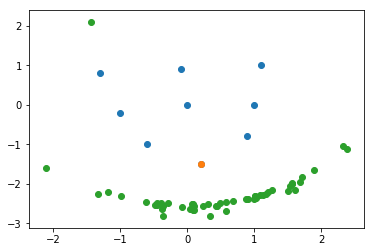

In [6]:
state = 8
plt.scatter(minima[:,0], minima[:,1])
plt.scatter(minima[state,0], minima[state,1], marker='o')
plt.scatter(traj[entries[state],2], traj[entries[state],3])

In [19]:
print integrator.exitCalls

3079


In [20]:
print integrator.entryCalls

28274


In [22]:
increments = traj[1:,1]-traj[:-1,1]

In [23]:
sortedTimes = np.argsort(increments)

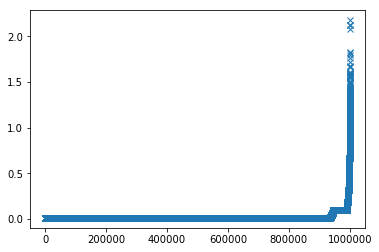

In [24]:
plt.plot(increments[sortedTimes], 'x')

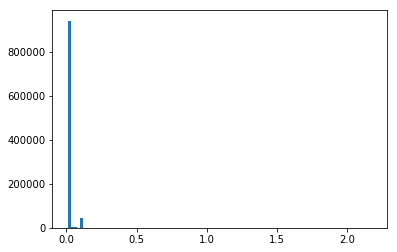

In [37]:
hst = plt.hist(increments, bins = 100)

In [28]:
print increments[sortedTimes[-1]]

2.176


In [29]:
print traj[sortedTimes[-1]-3:sortedTimes[-1]+2]

[[  4.97325000e+05   8.84228500e+03   0.00000000e+00   0.00000000e+00
    7.00000000e+00]
 [  4.97326000e+05   8.84238500e+03   0.00000000e+00   0.00000000e+00
    7.00000000e+00]
 [  4.97327000e+05   8.84248500e+03   0.00000000e+00   0.00000000e+00
    7.00000000e+00]
 [  4.97328000e+05   8.84258500e+03   0.00000000e+00   0.00000000e+00
    3.00000000e+00]
 [  4.97329000e+05   8.84476100e+03   1.08751016e+00   2.25217707e+00
   -1.00000000e+00]]


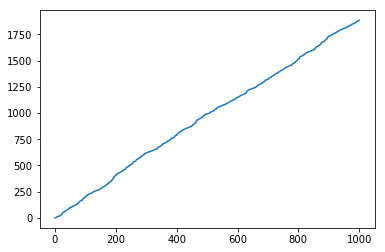

In [18]:
plt.plot(traj[:,0]*0.01, traj[:,1] )

In [19]:
print len(np.where(traj[:,4] >= 0)[0])

5532


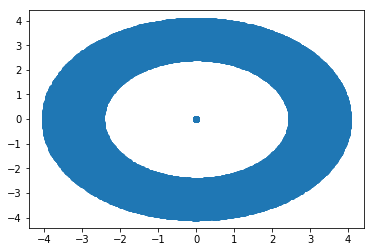

In [24]:
plt.scatter(traj[:,2], traj[:, 3])

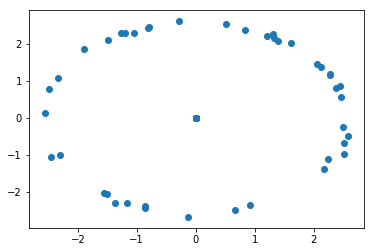

In [30]:
plt.scatter(traj[sortedTimes[-50:]+1,2], traj[sortedTimes[-50:]+1,3])

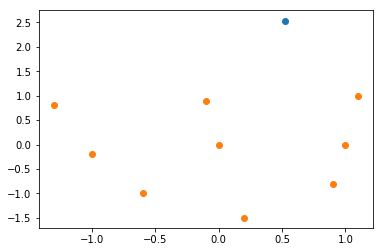

In [17]:
plt.scatter(traj[29319+1,2], traj[29319+1,3])
plt.scatter(minima[:,0], minima[:,1])

In [32]:
exits = []
for i in range(9):
    exits.append(np.where(np.logical_and(traj[1:,4]==-1, traj[:-1,4] == i))[0]+1)

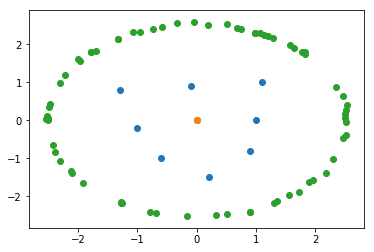

In [33]:
state = 0
plt.scatter(minima[:,0], minima[:,1])
plt.scatter(minima[state,0], minima[state,1], marker='o')
plt.scatter(traj[exits[state],2], traj[exits[state],3])

In [35]:
print len(exits[8])

523


In [54]:
print len(exits[8])

47
